In [191]:
path = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/"

In [192]:
import requests
from bs4 import BeautifulSoup
page = requests.get(path).text
soup = BeautifulSoup(page, "html.parser")

In [193]:
match = soup.find(attrs={"dataTables-content-main"})

In [194]:
data = []
rows = match.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [195]:
import pandas as pd
df = pd.DataFrame(data, columns=['bank', 'city', 'state', 'cert', 'AI', 'date', 'fund'])

In [196]:
df.tail()

,bank,city,state,cert,AI,date,fund
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646
562,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,"October 13, 2000",4645


In [197]:
len(df)

563

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bank    563 non-null    object
 1   city    563 non-null    object
 2   state   563 non-null    object
 3   cert    563 non-null    object
 4   AI      563 non-null    object
 5   date    563 non-null    object
 6   fund    563 non-null    object
dtypes: object(7)
memory usage: 30.9+ KB


In [205]:
df.date = pd.to_datetime(df['date'])

In [209]:
df['year'] = df['date'].dt.year

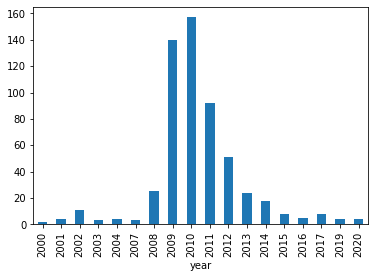

In [217]:
import matplotlib as plt
df['bank'].groupby(df.year).count().plot(kind='bar')